In [1]:
import numpy as np
import tensorflow as tf
import random as rn
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
# fix random seed for reproducibility

np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [2]:
import time
from keras import Model

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from keras_pandas import lib
from keras_pandas.Automater import Automater

In [5]:
from keras.layers import Dense

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [7]:
from keras.optimizers import Nadam
from keras.optimizers import adam
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

In [8]:
CSV_PATH2 = ('./input/components-a2.csv')

#dataset = tf.contrib.data.make_csv_dataset(CSV_PATH, batch_size=32)
data = pd.read_csv(CSV_PATH2,encoding="utf-8",decimal=',')#, header=None dtype="unicode"
data.head()
#cp1252 utf-8

,ProdNbr_c,Commodity_c,FunctionDesignation_c,ProdName_c,ProdNetWeight_n,ProdNetWeightNbr_n,ManId_c,ManDesignation_c,MC_n,ManStatus_c,...,SupplierManufacturingRisk_n,SupplierAggregatedRisk_n,CommercialAggregatedRisk_n,TechnicalAggregatedRisk_n,RecoveryTimeweeks_n,Rampuptimetofullproductionfromfirstdeliveryweeks_n,MRPVol_n,AvgPriceLatestYearUSD_n,Volume_n,target_c
0,0,6,317,0,42.0,10.0,25,422,1,1,...,2.0,1.0,1.0,1.0,6.0,10.0,0,0.24969,1776.0,4
1,0,6,317,0,42.0,10.0,27,422,1,1,...,0,0,0,0,0,0,0,0.24969,0,4
2,1,6,47,5,973.0,1000.0,11,168,1,1,...,0,0,0,0,0,0,0,0,0,3
3,2,6,392,15,972.0,100.0,9,322,1,1,...,3.0,3.0,3.0,3.0,26.0,6.0,67312.0,5.1466199999999995,68510.0,4
4,3,6,1,24,1.0,1.0,48,602,1,1,...,0,0,0,0,0,0,0,0,0,4


In [9]:
# Load data
observations = data
# Train /test split
train_observations, test_observations = train_test_split(observations)
train_observations = train_observations.copy()
test_observations = test_observations.copy()

# List out variable types

data_type_dict = {'numerical': ['ProdNetWeight_n', 'ProdNetWeightNbr_n','MaxSolderingTemp_n','ASGId_n','LeadTime_n',
                                'LeadTimewithForecast_n','RecoveryTimeweeks_n',
                                'Rampuptimetofullproductionfromfirstdeliveryweeks_n','MRPVol_n',
                   'AvgPriceLatestYearUSD_n','Volume_n'],
                  
                  'categorical': ['ProdNbr_c','FunctionDesignation_c','Commodity_c','ProdName_c', 'MC_n','ManStatus_c','target_c','SupplierManufacturingRisk_n','SupplierAggregatedRisk_n',
                                'CommercialAggregatedRisk_n','TechnicalAggregatedRisk_n']}
                  
output_var = 'target_c'


In [15]:
%%time
# Create and fit Automater
auto = Automater(data_type_dict=data_type_dict, output_var=output_var)
auto.fit(train_observations)
# Transform data
train_X, train_y = auto.fit_transform(train_observations)
test_X, test_y = auto.transform(test_observations)

# Create and fit keras (deep learning) model.

x = auto.input_nub
x = Dense(10)(x)
x = Dense(10)(x)
x = Dense(10)(x)
x = auto.output_nub(x)
optimizer = Nadam()
model = Model(inputs=auto.input_layers, outputs=x)

model.compile(optimizer=optimizer, loss=auto.suggest_loss(), metrics=['accuracy'])

history = model.fit(train_X, train_y, validation_data=(test_X,test_y), epochs=10)

C:\Users\ulf\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Train on 598 samples, validate on 200 samples
Epoch 1/10
598/598 [==============================] - 1s 2ms/step - loss: 1.7506 - acc: 0.3177 - val_loss: 1.5588 - val_acc: 0.4400
Epoch 2/10
598/598 [==============================] - 0s 83us/step - loss: 1.3302 - acc: 0.5017 - val_loss: 1.1352 - val_acc: 0.5850
Epoch 3/10
598/598 [==============================] - 0s 78us/step - loss: 0.7947 - acc: 0.7007 - val_loss: 0.8166 - val_acc: 0.6650
Epoch 4/10
598/598 [==============================] - 0s 80us/step - loss: 0.4327 - acc: 0.8562 - val_loss: 0.6900 - val_acc: 0.7550
Epoch 5/10
598/598 [==============================] - 0s 80us/step - loss: 0.2070 - acc: 0.9649 - val_loss: 0.6223 - val_acc: 0.7700
Epoch 6/10
598/598 [==============================] - 0s 80us/step - loss: 0.0807 - acc: 0.9866 - val_loss: 0.6019 - val_acc: 0.7750
Epoch 7/10
598/598 [==============================] - 0s 80us/step - loss: 0.0406 - acc: 0.9950 - val_loss: 0.6006 - val_acc: 0.7900
Epoch 8/10
598/598 [====

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


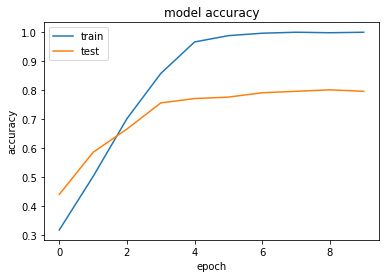

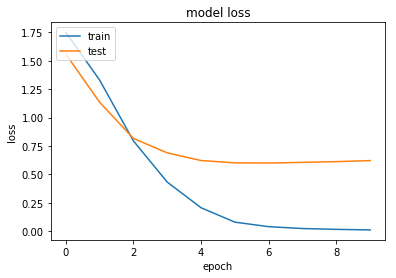

In [17]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
%%time
# Make model predictions and inverse transform model predictions, to get usable results

pred_test_y = model.predict(test_X)   

Wall time: 194 ms


In [19]:
Predicted = auto.inverse_transform_output(pred_test_y)

In [20]:
df2 = test_observations.assign(Predicted = (Predicted))

In [21]:
viewdf = df2.iloc[: , [0, 2,25,26]]
viewdf

,ProdNbr_c,FunctionDesignation_c,target_c,Predicted
694,392,368,2,2
665,374,421,2,2
63,32,103,4,4
533,301,58,4,4
66,33,104,4,4
621,346,127,3,3
346,191,190,3,3
490,275,160,4,4
645,363,302,4,4
456,253,282,4,4
